## KNN(K nearest Neighbours )
### Identifies some closest neighbours to the new point 

### Assigns the new point to the categogary  to which the majority of points belongs 

# Step 1
## Find distance between two points 
### Can be done using pythagoras theorem

In [1]:
import numpy as np
def distance(p1 , p2):
    return np.sqrt(np.sum(np.power(p1-p2,2)))


p1 = np.array([1,1])
p2 = np.array([4,4])

distance(p1 , p2)

4.242640687119285

# Function to count the majority of votes

In [2]:
import random

def majority_vote(votes):
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
            
    winner=[]
    max_count = max(vote_counts.values())
    for vote , count in vote_counts.items():
        if count == max_count:
            winner.append(vote)
            
    return random.choice(winner)


votes = [1,2,3,3,4,4,5,5,5,5,6,7,7,7,7]

majority_vote(votes)

7

# Find nearest points 

In [3]:
# Loop aver all points 
    # compute the distance between point p and every other point
# sort distances and return those k points that are nearest to point p

(0.5, 3.5, 0.5, 3.5)

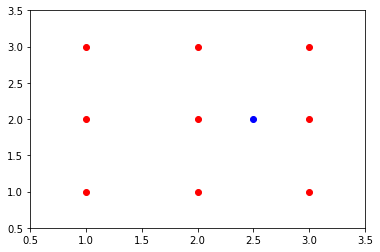

In [4]:
import matplotlib.pyplot as plt

points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

In [5]:
distances = np.zeros(points.shape[0])
for i in range(len(points)):
    distances[i]=distance(p,points[i])

In [6]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [7]:
ind = np.argsort(distances)

In [8]:
distances[ind[0:2]]

array([0.5, 0.5])

In [9]:
# Function 
def find_nearest_neignbors(p,points,k=4):
    distances = np.zeros(points.shape[0])
    for i in range(len(points)):
        distances[i]=distance(p,points[i])
    ind = np.argsort(distances)
    return ind[:k]
    

In [10]:
index = find_nearest_neignbors(p,points,3)
print(points[index])

[[2 2]
 [3 2]
 [2 1]]


In [11]:
# Pre Prediction points for predicting 
# class to predict new point
outcomes = np.array([0,0,0,0,1,1,1,1,1])
len(outcomes)

9

In [12]:
# Predictions 
def knn_predict(p, points, outcomes, k = 5):
    ind = find_nearest_neignbors(p,points,k)
    return majority_vote(outcomes[ind])

In [13]:
knn_predict(np.array([1,3.7]), points, outcomes,k = 4)

1

## Generating synthetic data 


In [14]:
import scipy.stats as ss

In [15]:
# ss.norm(0,1).rvs((5,2))# 5 rows and 2 columns


In [16]:
# ss.norm(1,1).rvs((5,2)) # 5 rows and 2 columns


In [17]:
# np.concatenate((ss.norm(0,1).rvs((5,2)),ss.norm(1,1).rvs((5,2))),axis=0)

In [18]:
# # Creates array of 0 and 1 specified n as number of times we want
# n=5
# outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
# outcomes

In [19]:
def generate_synth_data(n = 50):
    """Create two sets of points from bivariate normal distributions."""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points , outcomes)

In [20]:
(points , outcomes )= generate_synth_data(20)

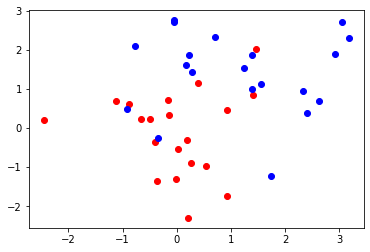

In [21]:
def generate_synth_data(n = 50):
    """Create two sets of points from bivariate normal distributions."""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points , outcomes)
n = 20
plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro")
plt.plot(points[n:,0],points[n:,1],"bo")

In [22]:
# Creating a prediction grid

def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on prediction grid"""
    (x_min,x_max,y_min,y_max) = limits
    xs = np.arange(x_min,x_max,h)
    ys = np.arange(y_min,y_max,h)
    xx, yy = np.meshgrid(xs,ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

# Plotting the prediction grid 

In [23]:
# Function to plot predictions 
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [24]:
(predictors , outcomes )= generate_synth_data()

In [25]:
predictors.shape

(100, 2)

In [26]:
outcomes.shape

(100,)

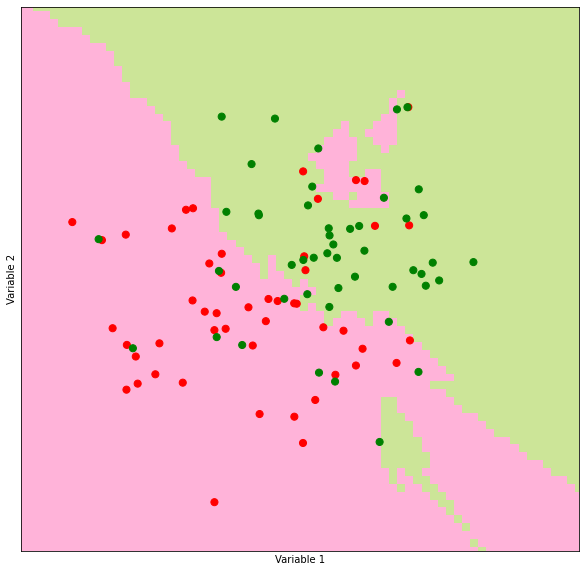

In [27]:
k = 5 ; filename = "Knn_Synth_5.pdf"; limits = (-3,4,-3,4); h = 0.1

(xx, yy, prediction_grid)=make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

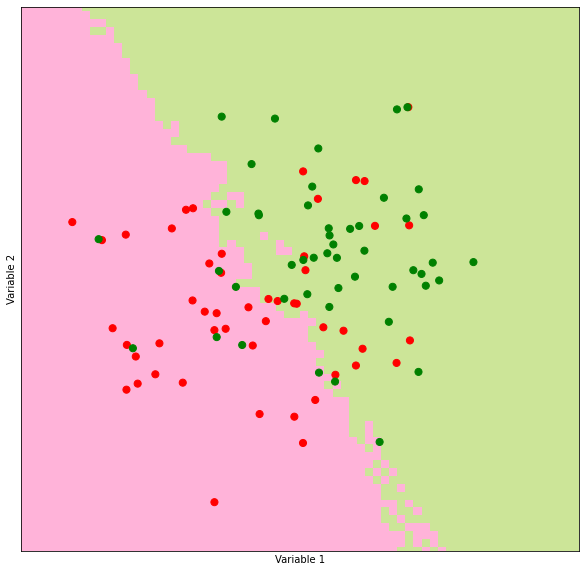

In [28]:
k = 50 ; filename = "Knn_Synth_50.pdf"; limits = (-3,4,-3,4); h = 0.1
(xx, yy, prediction_grid)=make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

#### changing the value of "K" can maximize the accuracy

## Applying KNN Classacifier made by me and the one from sklearn and compare them 

In [29]:
from sklearn import datasets

In [30]:
iris = datasets.load_iris()

In [31]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# Plotting iris data set

In [32]:
predictors = iris.data[:,0:2]
outcomes = iris.target

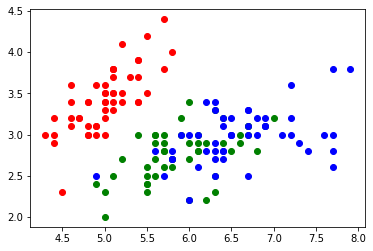

In [33]:
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")


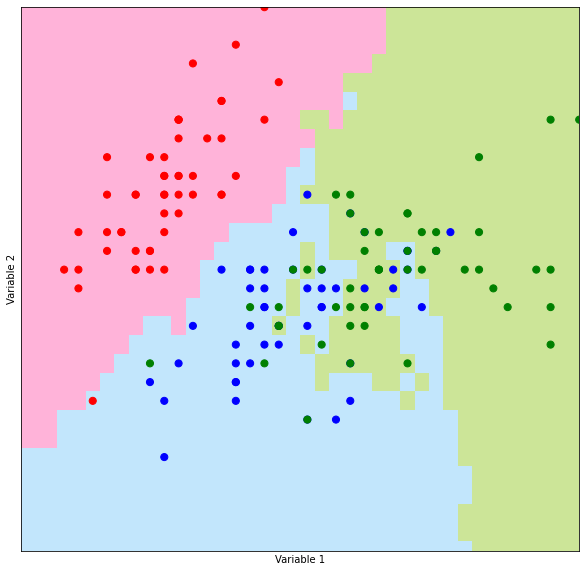

In [34]:
# Making prediction grid
k = 5 ; filename = "iris.pdf"; limits = (4,8,1.5,4.4); h = 0.1
(xx, yy, prediction_grid)=make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [43]:
sk_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [42]:
my_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
# compare the predictions of both models

100*np.mean(sk_predictions == my_predictions)

99.33333333333333

In [50]:
# Check the accuracy of my model 

100*np.mean(my_predictions == outcomes)

84.66666666666667

In [51]:
# Check the accuracy of sklearn  model 

100*np.mean(sk_predictions == outcomes)

84.0

## I am able to achive equal accuracy compare to the sklearn model with my model